In [123]:
import pandas as pd
import seaborn as sns
import statistics

data = pd.read_csv('titanic_train.csv')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


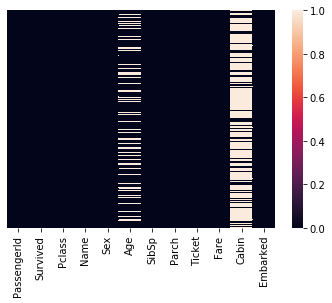

In [124]:
#data.head()
sns.heatmap(data.isnull(), yticklabels = False)
data.describe()

In [125]:
data = data.drop(labels = ['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)

In [126]:
i = 1
age_median = []
while i <= 3:
    p = data[data['Pclass'] == i]
    med = p['Age'].median()
    age_median.append(med)
    i += 1

print (age_median)

[37.0, 29.0, 24.0]


In [131]:
age_null = data['Age'].isnull()
for x in range(len(data)):
    i = 0
    while i <= 3:
        if (data['Pclass'][x] == i) & (age_null[x]):
            data['Age'][x] = age_median[i-1]
        i += 1

In [128]:
t1 = data[data['Pclass'] == 3]
print(sum(t1['Age'].isnull()))

0


In [129]:
data.dropna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [130]:
sex = pd.get_dummies(data['Sex'], drop_first = True)
embarked = pd.get_dummies(data['Embarked'], drop_first = True)
data = data.drop(labels = ['Sex', 'Embarked'], axis = 1)
data = pd.concat([data, sex, embarked], axis = 1)
print(data.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1
